In [1]:
# rdkit mols are displayed as images
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs

# descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

# diversity picker
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

# plots
import seaborn

# scikit learn
# conda install -c conda-forge scikit-learn 
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing

# other packages
import pandas as pd
import csv
import re
import gzip

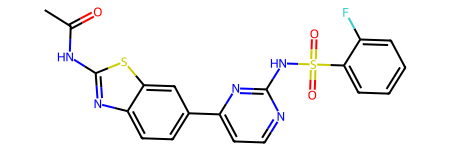

In [60]:
mtor_ligands[0]

In [61]:
# load your own set, and DrugBank :)
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = 0
        mtor_ligands.append((mol,pchembl))



In [3]:
from rdkit.Chem import rdMolDescriptors

In [62]:
mqns = [rdMolDescriptors.MQNs_(mol) for mol, act in mtor_ligands]

In [63]:
acts = [act for mol, act in mtor_ligands]

In [69]:
acts = np.array([np.floor(float(act)) for mol, act in mtor_ligands])

'7.35'

In [14]:
import sklearn
import numpy as np

In [15]:
mqns_ar = np.array(mqns)

In [31]:
mqns_norm = preprocessing.normalize(mqns_ar, axis=0)

In [37]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=42)
pca_res = pca.fit_transform(mqns_norm)

In [43]:
import matplotlib.pyplot as plt

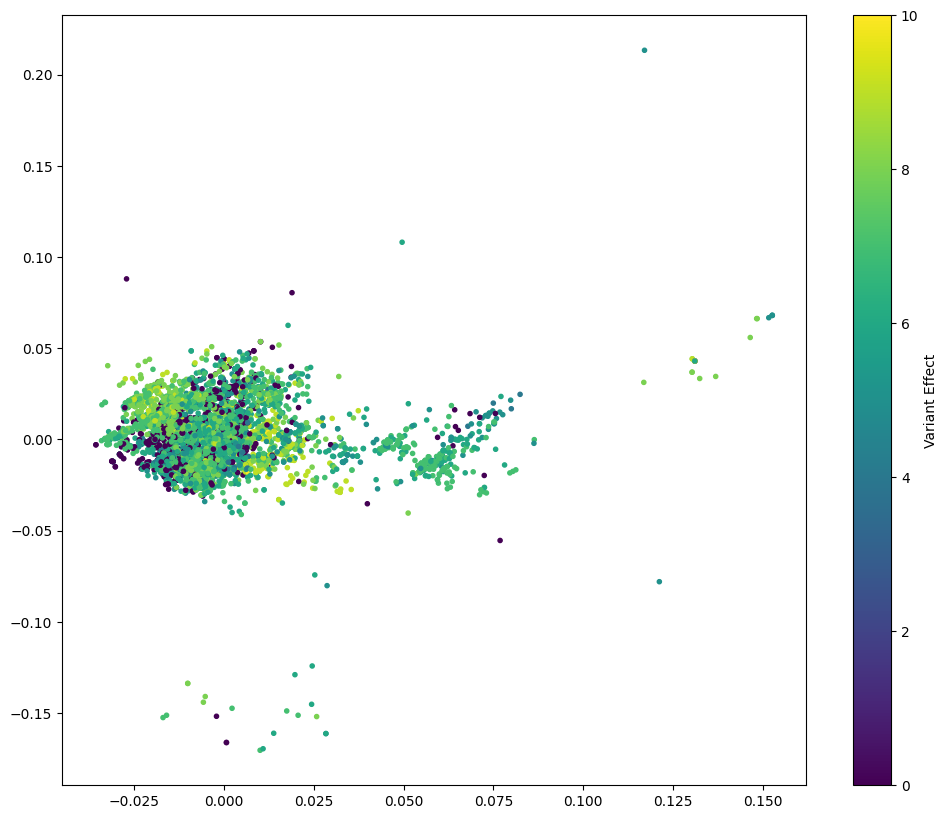

In [70]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sc = ax.scatter(pca_res[:,0], pca_res[:,2], c=acts, marker='.')
# ax.set_xlabel('PCA first principal component')
# ax.set_ylabel('PCA second principal component')
plt.colorbar(sc, label='Variant Effect')

In [47]:
import umap

In [49]:
ump = umap.UMAP()

In [50]:
umap_res = ump.fit_transform(mqns_norm)


In [52]:
umap_res

array([[-5.7581663,  6.8438015],
       [ 1.5164291,  5.9929347],
       [ 1.5162568,  5.9574256],
       ...,
       [ 8.150873 , -7.698462 ],
       [ 7.4490757, -2.9476373],
       [ 4.3020797, 10.758309 ]], dtype=float32)

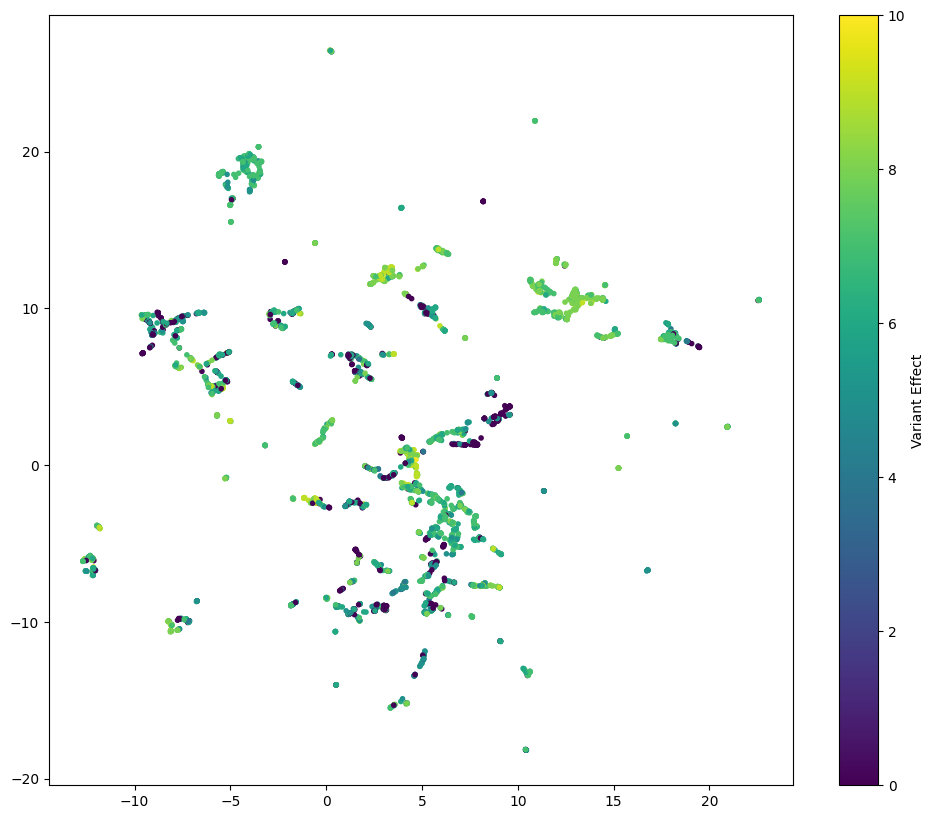

In [71]:
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sc = ax.scatter(umap_res[:,0], umap_res[:,1], c=acts, marker='.')
# ax.set_xlabel('PCA first principal component')
# ax.set_ylabel('PCA second principal component')
plt.colorbar(sc, label='Variant Effect')

In [81]:
mtor_ligands_fp = 

In [85]:
def distance_function(index1, index2, *args, fingerprints=mtor_ligands_fp,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)

In [86]:
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
picker = MaxMinPicker
picked = list(picker.LazyPick(distance_function, len(mtor_ligands),45))

ArgumentError: Python argument types in
    MaxMinPicker.LazyPick(function, int, int)
did not match C++ signature:
    LazyPick(class RDPickers::MaxMinPicker * __ptr64 self, class boost::python::api::object distFunc, int poolSize, int pickSize, class boost::python::api::object firstPicks=(), int seed=-1, class boost::python::api::object useCache=None)